In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE 
from collections import Counter
from datetime import datetime
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.simplefilter('ignore')

#### Loading The Dataset

In [3]:
df = pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [5]:
# The Shape of the loaded dataset
df.shape

(205843, 6)

In [6]:
# Retrieving the columns of the dataset
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [7]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [8]:
# Retreiving the unique entries count present in each column
for i in df.columns:
    print(f"Unique entries for column {i} = {df[i].nunique()}" )

Unique entries for column company_hash = 37299
Unique entries for column email_hash = 153443
Unique entries for column orgyear = 77
Unique entries for column ctc = 3360
Unique entries for column job_position = 1016
Unique entries for column ctc_updated_year = 7


In [9]:
email_hash_counts = Counter(df['email_hash'])

print("Top 10 email hashes and their frequency of occurrence:")
for email_hash, frequency in email_hash_counts.most_common(10):
    print(f"Email hash: {email_hash}, Frequency: {frequency}")

Top 10 email hashes and their frequency of occurrence:
Email hash: bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b, Frequency: 10
Email hash: 6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c, Frequency: 9
Email hash: 3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378, Frequency: 9
Email hash: 298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee, Frequency: 9
Email hash: d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065, Frequency: 8
Email hash: 4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c, Frequency: 8
Email hash: c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183, Frequency: 8
Email hash: d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551, Frequency: 8
Email hash: faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0, Frequency: 8
Email hash: b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66, Frequency: 8


In [10]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

#### Missing Values 

In [11]:
most_frequent_category = df['company_hash'].mode()[0]
df['company_hash'] = df['company_hash'].fillna(most_frequent_category)

most_frequent_job = df['job_position'].mode()[0]
df['job_position'] = df['job_position'].fillna(most_frequent_job)

In [12]:
columns_to_impute = ['orgyear']

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [13]:
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [14]:
# Convert the 'Age' and 'Gender' column to integer
df['orgyear'] = df['orgyear'].astype(int)

df['ctc_updated_year'] = df['ctc_updated_year'].astype(int)

In [15]:
current_year = datetime.now().year

# Subtract 'orgyear' from the current year to calculate 'years_of_experience'
df['years_of_experience'] = current_year - df['orgyear']
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7


In [16]:
df = df.drop_duplicates(subset=['email_hash', 'company_hash'])
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7


In [17]:
df.shape

(160312, 7)

#### Visualization

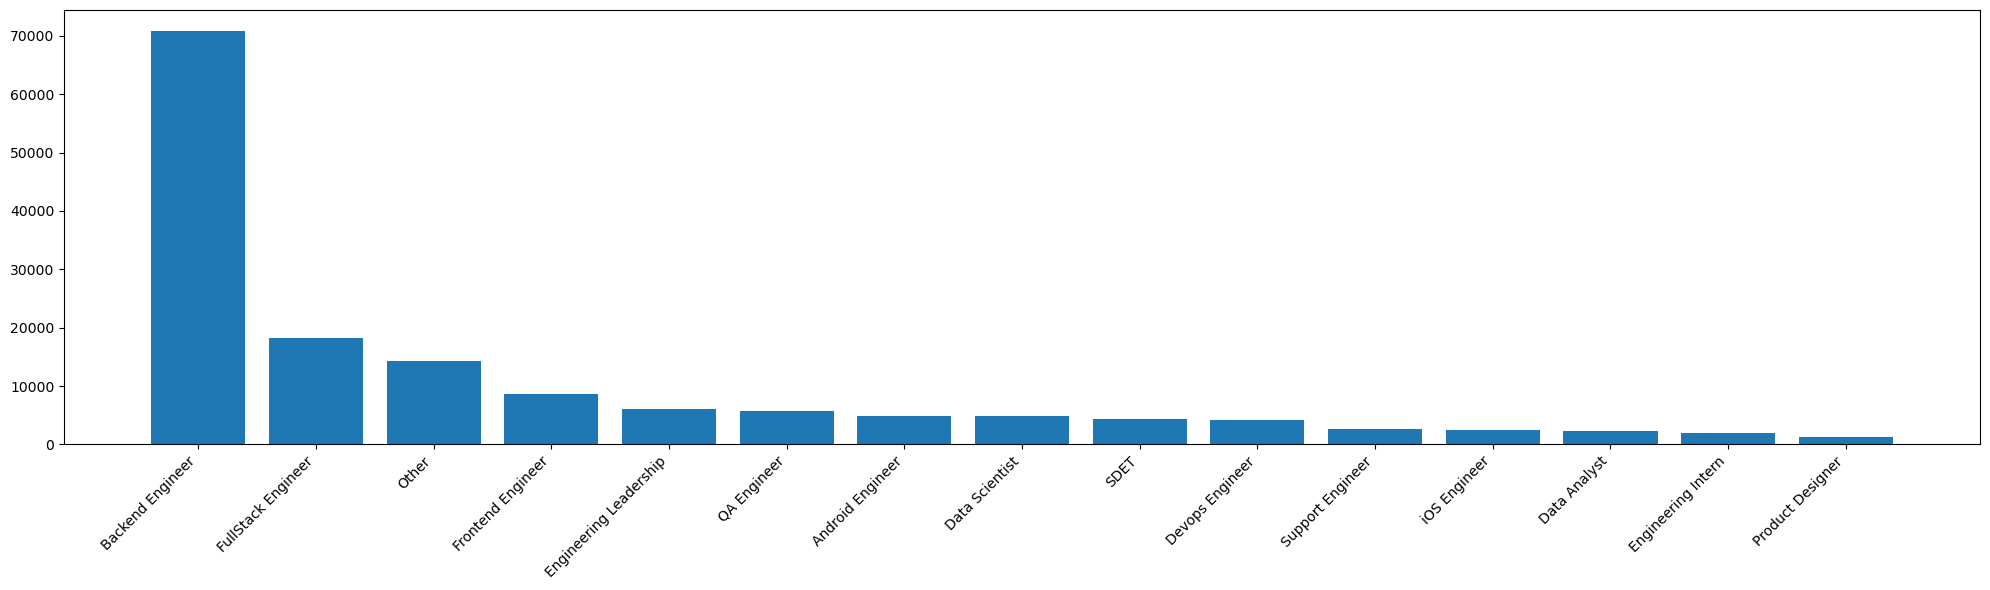

In [18]:
count_per_age = df['job_position'].value_counts().head(15).reset_index()
count_per_age.columns = ['job_position', 'count']

plt.figure(figsize=(20, 6))

plt.bar(count_per_age['job_position'], count_per_age['count'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [19]:
result = df.groupby('job_position')['ctc'].agg(['max', 'min', 'size'])

top_15_job_positions = result.sort_values(by='size', ascending=False).head(15).reset_index()

top_15_job_positions

,job_position,max,min,size
0,Backend Engineer,1000150000,2,70888
1,FullStack Engineer,200000000,600,18243
2,Other,200000000,24,14309
3,Frontend Engineer,200000000,1000,8660
4,Engineering Leadership,200000000,1000,6025
5,QA Engineer,200000000,2000,5774
6,Android Engineer,200000000,25,4801
7,Data Scientist,200000000,4000,4785
8,SDET,200000000,3500,4439
9,Devops Engineer,200000000,2000,4184


In [20]:
# Determine the top 5 job positions based on their frequency
top_5_job_positions = df['job_position'].value_counts().head(5).index.tolist()

# Filter the DataFrame to include only the rows with the top 5 job positions
df_top_5 = df[df['job_position'].isin(top_5_job_positions)]

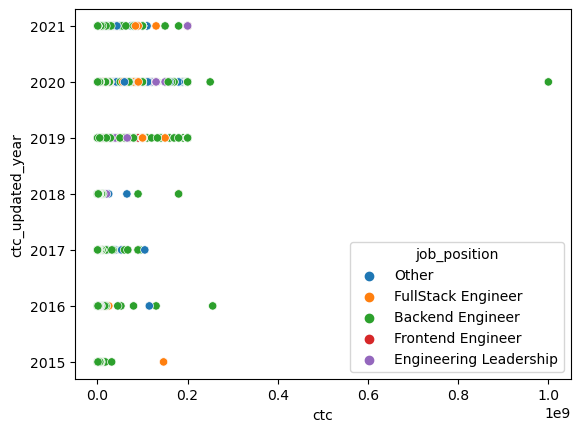

In [21]:
sns.scatterplot(x='ctc',y='ctc_updated_year',data=df_top_5,hue = 'job_position')
plt.show()

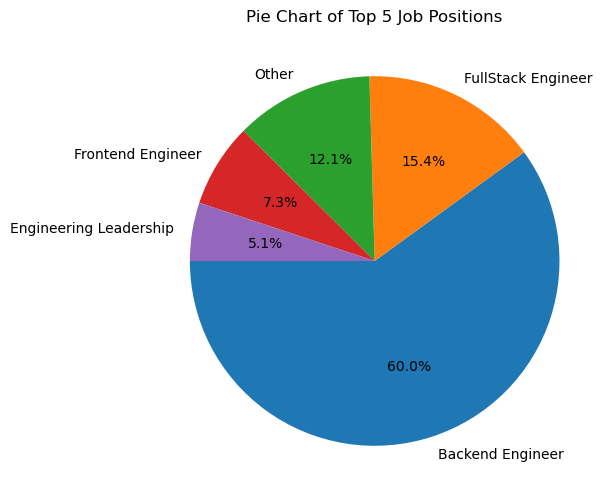

In [22]:
plt.figure(figsize=(6, 6))
job_position_counts = df_top_5['job_position'].value_counts()
plt.pie(job_position_counts, labels=job_position_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Pie Chart of Top 5 Job Positions')
plt.show()

In [23]:
df[['orgyear', 'ctc_updated_year']].value_counts().head(5)

orgyear  ctc_updated_year
2015     2019                6498
2016     2019                6485
2019     2021                6356
2017     2019                5771
2018     2020                5656
Name: count, dtype: int64

In [76]:
df['orgyear'].value_counts().head()

orgyear
2016    18158
2018    17993
2017    17437
2015    16591
2019    16231
Name: count, dtype: int64

In [77]:
df['ctc_updated_year'].value_counts().head()

ctc_updated_year
2019    57710
2021    42075
2020    38933
2017     7187
2018     6632
Name: count, dtype: int64

In [25]:
top_5_joining_yr = df['orgyear'].value_counts().head(5).index.tolist()

df_top_5_joining_yr = df[df['orgyear'].isin(top_5_joining_yr)]

df_top_5_joining_yr

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7
...,...,...,...,...,...,...,...
205829,yomw,6d6c2a8824718de73d60e772622ebf3e67a522dbf8fc76...,2019,700000,Backend Engineer,2019,5
205830,zgn vuurxwvmrt,586e06d65892218f96debd87457bc127de3cae87dd0edf...,2019,700000,Backend Engineer,2019,5
205831,tcxct ogenfvqt vzvrjnxwo,5b5763bd9c93e9afd38452cc267e3c547497d76747eb89...,2018,550000,Backend Engineer,2019,6
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020,7


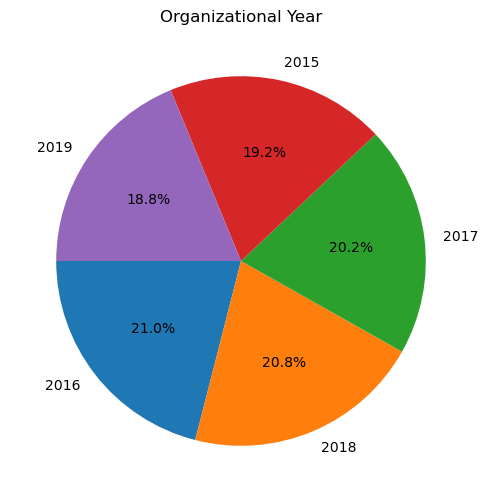

In [26]:
plt.figure(figsize=(6, 6))
org_yr = df_top_5_joining_yr['orgyear'].value_counts()
plt.pie(org_yr, labels=org_yr.index, autopct='%1.1f%%', startangle=180)
plt.title('Organizational Year')
plt.show()

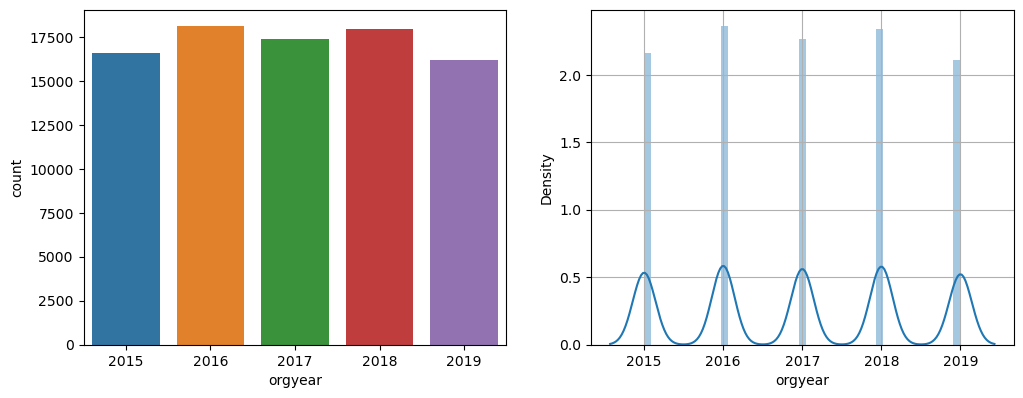

In [27]:
plt.figure(figsize=(12, 20))

# Plotting a countplot for Grade column.
plt.subplot(4, 2, 1)
sns.countplot(x='orgyear',data=df_top_5_joining_yr)

# Plotting a displot for the column Grade
plt.subplot(4, 2, 2)
sns.distplot(df_top_5_joining_yr['orgyear'])
plt.grid()

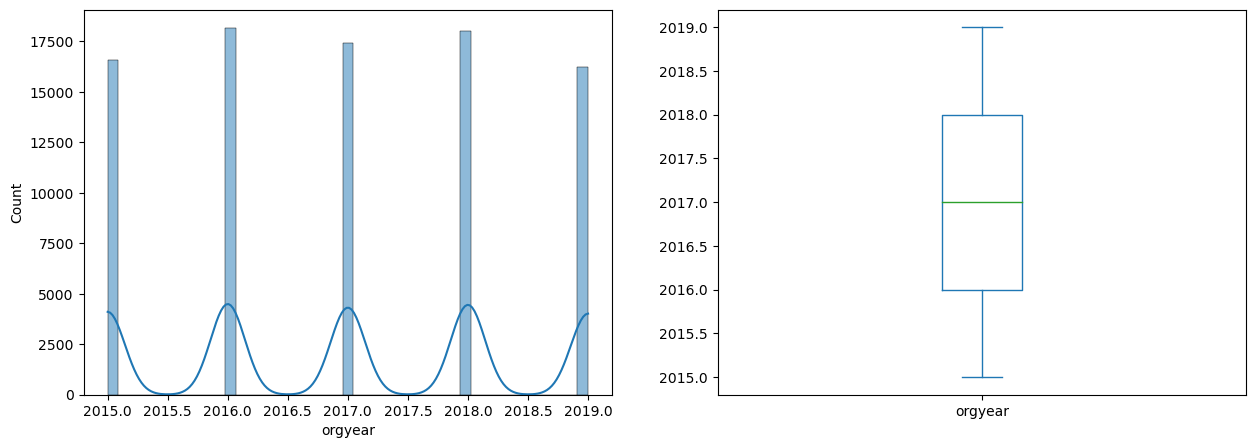

In [28]:
plt.subplot(1,2,1)
sns.histplot(df_top_5_joining_yr['orgyear'],kde=True)
plt.subplot(1,2,2)
df_top_5_joining_yr['orgyear'].plot.box(figsize=(15,5))
plt.show()

In [29]:
top_5_ctc_updated_yr = df['ctc_updated_year'].value_counts().head(5).index.tolist()

df_top_5_ctc_updated_yr = df[df['ctc_updated_year'].isin(top_5_ctc_updated_yr)]

df_top_5_ctc_updated_yr

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7
...,...,...,...,...,...,...,...
205837,zgn vuurxwvmrt,fe34477c3f64e6ed4301417c8fb9d5e2608722a10f1f4e...,2021,800000,Backend Engineer,2021,3
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,Backend Engineer,2019,16
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020,7
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021,700000,Backend Engineer,2021,3


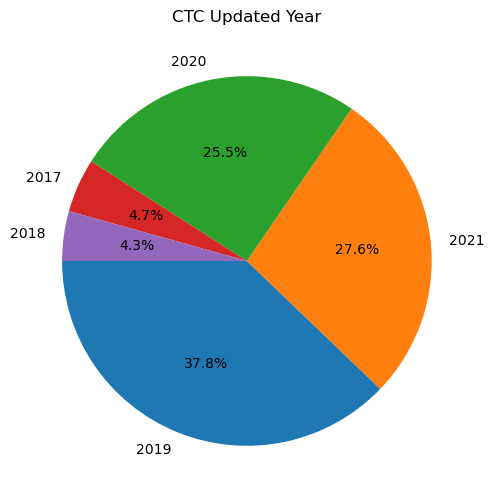

In [30]:
plt.figure(figsize=(6, 6))
ctc_yr = df_top_5_ctc_updated_yr['ctc_updated_year'].value_counts()
plt.pie(ctc_yr, labels=ctc_yr.index, autopct='%1.1f%%', startangle=180)
plt.title('CTC Updated Year')
plt.show()

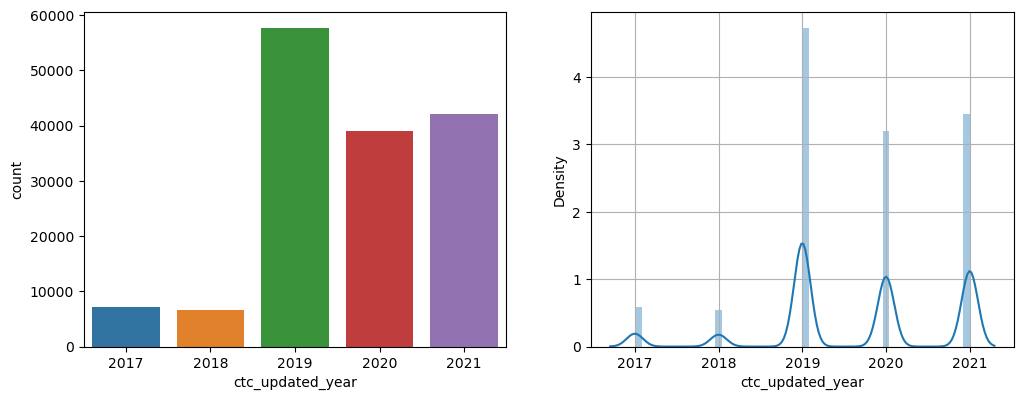

In [31]:
plt.figure(figsize=(12, 20))

# Plotting a countplot for Grade column.
plt.subplot(4, 2, 1)
sns.countplot(x='ctc_updated_year',data=df_top_5_ctc_updated_yr)

# Plotting a displot for the column Grade
plt.subplot(4, 2, 2)
sns.distplot(df_top_5_ctc_updated_yr['ctc_updated_year'])
plt.grid()

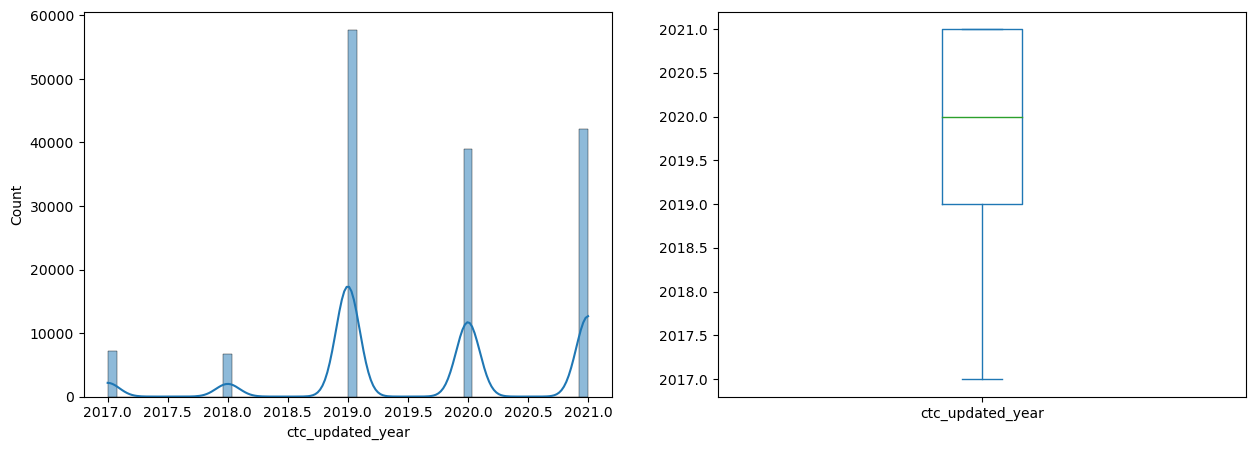

In [32]:
plt.subplot(1,2,1)
sns.histplot(df_top_5_ctc_updated_yr['ctc_updated_year'],kde=True)
plt.subplot(1,2,2)
df_top_5_ctc_updated_yr['ctc_updated_year'].plot.box(figsize=(15,5))
plt.show()

In [33]:
top_10_expr = df['years_of_experience'].value_counts().head(10).index.tolist()

df_top_10_expr = df[df['years_of_experience'].isin(top_10_expr)]

df_top_10_expr

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7
...,...,...,...,...,...,...,...
205835,xgz,b8632b290be3b4b50c5ae979f3bf9a79ac805d172b1459...,2013,2280000,Backend Engineer,2019,11
205836,mvqwrvjo,53442a1663ccfdbd473055fee4e4ac9f4bb398dc446242...,2011,2250000,Backend Engineer,2019,13
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020,7
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,5100000,Backend Engineer,2019,5


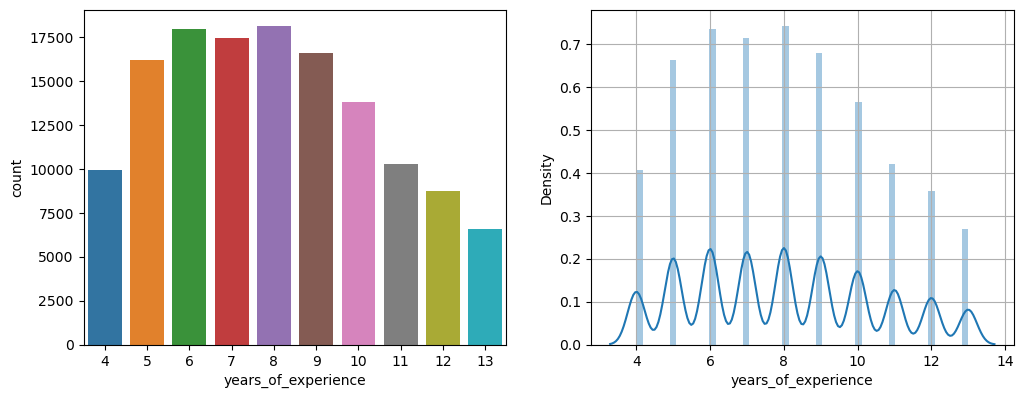

In [34]:
plt.figure(figsize=(12, 20))

# Plotting a countplot for Grade column.
plt.subplot(4, 2, 1)
sns.countplot(x='years_of_experience',data=df_top_10_expr)

# Plotting a displot for the column Grade
plt.subplot(4, 2, 2)
sns.distplot(df_top_10_expr['years_of_experience'])
plt.grid()

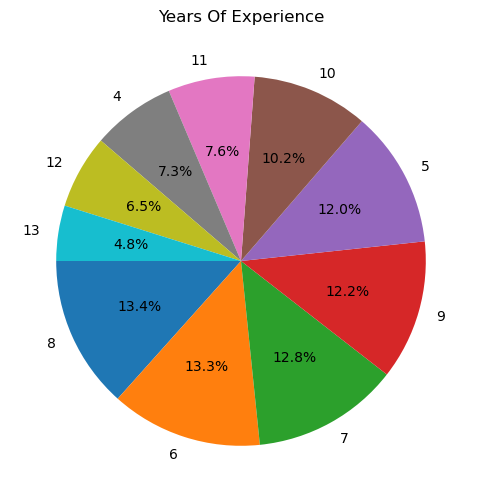

In [35]:
plt.figure(figsize=(6, 6))
exp_yr = df_top_10_expr['years_of_experience'].value_counts()
plt.pie(exp_yr, labels=exp_yr.index, autopct='%1.1f%%', startangle=180)
plt.title('Years Of Experience')
plt.show()

In [36]:
result = df.groupby(['job_position', 'years_of_experience'])['ctc'].max()

top_15_jobs = result.sort_values(ascending=False).head(15).reset_index()

top_15_jobs

,job_position,years_of_experience,ctc
0,Backend Engineer,9,1000150000
1,Backend Engineer,6,255555555
2,Backend Engineer,3,250000000
3,Other,33,200000000
4,Frontend Engineer,3,200000000
5,Frontend Engineer,11,200000000
6,Backend Engineer,12,200000000
7,Frontend Engineer,9,200000000
8,Frontend Engineer,8,200000000
9,Frontend Engineer,7,200000000


In [37]:
result = df.groupby(['job_position'])['ctc'].max()

top_15_jobs = result.sort_values(ascending=False).head(15).reset_index()

top_15_jobs

,job_position,ctc
0,Backend Engineer,1000150000
1,Devops Engineer,200000000
2,Product Designer,200000000
3,Backend Architect,200000000
4,Other,200000000
5,Security Leadership,200000000
6,iOS Engineer,200000000
7,Database Administrator,200000000
8,Program Manager,200000000
9,Non Coder,200000000


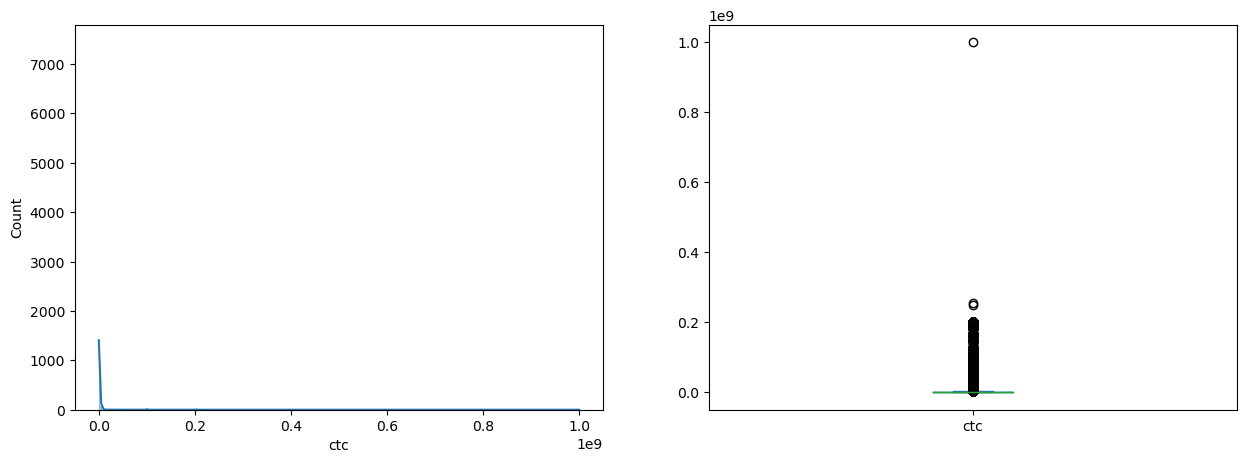

In [38]:
plt.subplot(1,2,1)
sns.histplot(df['ctc'],kde=True)
plt.subplot(1,2,2)
df['ctc'].plot.box(figsize=(15,5))
plt.show()

In [39]:
# We're calculate the IQR
Q1 = df['ctc'].quantile(0.25)
Q3 = df['ctc'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
# Defined a threshold for identifying outliers
threshold = 1.5

lower_bound = Q1 - (IQR * threshold)
upper_bound = Q3 + (IQR * threshold)

# Identify outliers based on the threshold
outliers = df[(df['ctc'] < (Q1 - threshold * IQR)) | (df['ctc'] > (Q3 + threshold * IQR))]
outliers

1150000.0


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
25,nxbto xzntqztn,d2668cb959e5657c3881413257b9850caa1359c7ce959a...,2015,9500000,Backend Engineer,2019,9
38,evzzxt bvt,69ef6838be8ee5b628375b4cc160ba54c1f7cab8c3b130...,2006,11800000,QA Engineer,2019,18
93,xb v onhatzn,2b0daf6243847309e75a47fb22e9e3dc3f79031edf464a...,2021,5000000,Android Engineer,2020,3
106,oxburjyq ogrhnxgzo rru,996aef9bba62bd99d6cb8e8c112c0ec8096b203ae50b97...,2017,200000000,Support Engineer,2020,7
118,bgzgnjut,a37740bc0cedb23fd029276cbb7f4e821cca7df8dd0f70...,2011,6300000,Backend Engineer,2019,13
...,...,...,...,...,...,...,...
205808,vbvkgz,6992f22d82e33d5e9c625dd2799b874868b6c8dc03fa16...,2013,4200000,Backend Engineer,2019,11
205821,rxnyxhb ntwyzgrgsxto,3def1401b5a8879eeb4a8465663a9c6c66702c85444d7e...,2012,3500000,Backend Engineer,2016,12
205825,vbvkgz,95023bca0172ad67bfc3453550c5cf056557bc2c8c7169...,2016,4800000,Backend Engineer,2020,8
205833,vbvkgz,f4415be48a1ef885e086dcd72181f667a289641e66f828...,2014,3800000,Backend Engineer,2019,10


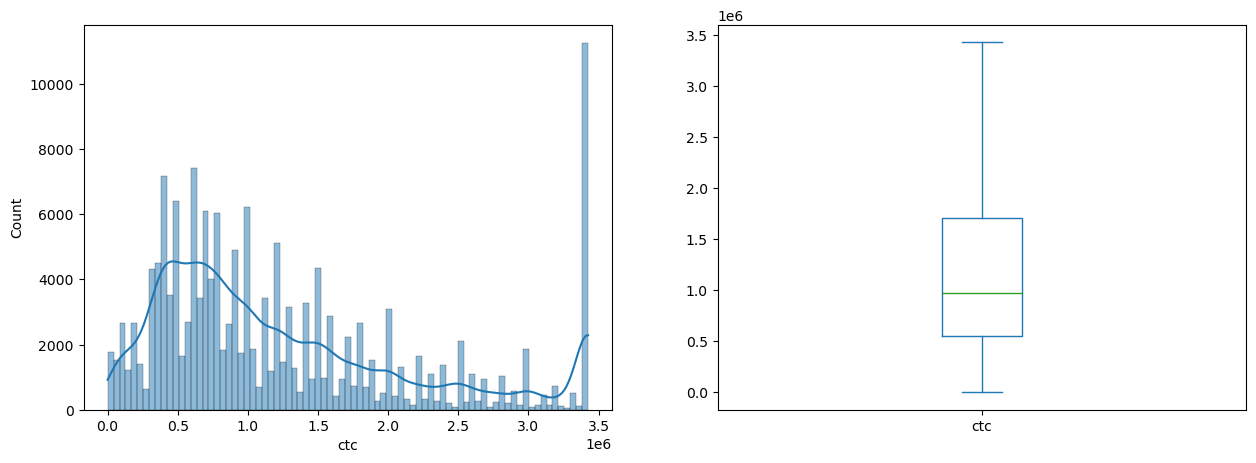

In [40]:
## Removing the outliers from the Income we're clipping the value between lower and upper bound.
df['ctc'] = df['ctc'].clip(lower=lower_bound, upper=upper_bound)

plt.subplot(1,2,1)
sns.histplot(df['ctc'],kde=True)
plt.subplot(1,2,2)
df['ctc'].plot.box(figsize=(15,5))
plt.show()

In [41]:
df['increment_or_promotion'] = df['ctc_updated_year'] >= df['orgyear']
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8,True
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6,True
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9,True
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7,True
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7,True


In [42]:
bin_edges = [0, 1000000, 2000000, float('inf')]
bin_labels = ['Low', 'Average', 'High']

# Categorize 'CTC' into bins
df['ctc_bin'] = pd.cut(df['ctc'], bins=bin_edges, labels=bin_labels, right=False)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8,True,Average
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6,True,Low
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9,True,High
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7,True,Low
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7,True,Average


In [81]:
df['ctc_bin'].value_counts()

ctc_bin
Low        80626
Average    46990
High       32696
Name: count, dtype: int64

In [43]:
for col in ['company_hash', 'email_hash']:
    df[col] = df[col].str.replace('[^A-Za-z0-9]+', '', regex=True)

df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8,True,Average
1,qtrxvzwtxzegwgbbrxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6,True,Low
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9,True,High
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7,True,Low
4,qxensqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7,True,Average


In [44]:
summary_statistics = df.groupby(['company_hash', 'job_position', 'years_of_experience'])['ctc'].describe()
summary_statistics

count  \
company_hash                job_position       years_of_experience          
0                           Backend Engineer   4                      1.0   
0000                        Other              7                      1.0   
01ojztqsj                   Android Engineer   8                      1.0   
                            Frontend Engineer  13                     1.0   
05mzexzytvrnyuqxcvntrxbxnta Backend Engineer   5                      1.0   
...                                                                   ...   
zz                          Backend Engineer   15                     1.0   
                            Other              11                     1.0   
zzbztdnstzvacxogqjucnrna    FullStack Engineer 7                      1.0   
zzgato                      Backend Engineer   10                     1.0   
zzzbzb                      Other              34                     1.0   

                                                                         mean  \
company_hash                job_position       years_of_experience              
0                           Backend Engineer   4                     100000.0   
0000                        Other              7                     300000.0   
01ojztqsj                   Android Engineer   8                     270000.0   
                            Frontend Engineer  13                    830000.0   
05mzexzytvrnyuqxcvntrxbxnta Backend Engineer   5                    1100000.0   
...                                                                       ...   
zz                          Backend Engineer   15                    500000.0   
                            Other              11                   1370000.0   
zzbztdnstzvacxogqjucnrna    FullStack Engineer 7                     600000.0   
zzgato                      Backend Engineer   10                    130000.0   
zzzbzb                      Other              34                    720000.0   

                                                                    std  \
company_hash                job_position       years_of_experience        
0                           Backend Engineer   4                    NaN   
0000                        Other              7                    NaN   
01ojztqsj                   Android Engineer   8                    NaN   
                            Frontend Engineer  13                   NaN   
05mzexzytvrnyuqxcvntrxbxnta Backend Engineer   5                    NaN   
...                                                                 ...   
zz                          Backend Engineer   15                   NaN   
                            Other              11                   NaN   
zzbztdnstzvacxogqjucnrna    FullStack Engineer 7                    NaN   
zzgato                      Backend Engineer   10                   NaN   
zzzbzb                      Other              34                   NaN   

                                                                          min  \
company_hash                job_position       years_of_experience              
0                           Backend Engineer   4                     100000.0   
0000                        Other              7                     300000.0   
01ojztqsj                   Android Engineer   8                     270000.0   
                            Frontend Engineer  13                    830000.0   
05mzexzytvrnyuqxcvntrxbxnta Backend Engineer   5                    1100000.0   
...                                                                       ...   
zz                          Backend Engineer   15                    500000.0   
                            Other              11                   1370000.0   
zzbztdnstzvacxogqjucnrna    FullStack Engineer 7                     600000.0   
zzgato                      Backend Engineer   10                    130000.0   
zzzbzb                      Other              34               

In [45]:
# Group by company and calculate average CTC per company
average_ctc_per_company = df.groupby('company_hash')['ctc'].mean()

# Group by role and calculate average CTC per role
average_ctc_per_role = df.groupby('job_position')['ctc'].mean()

# Group by years of experience and calculate average CTC per years of experience
average_ctc_per_experience = df.groupby('years_of_experience')['ctc'].mean()


In [46]:
df.loc[df.company_hash == 'nvnvwgzohrnvzwjotqcxwto']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin
331,nvnvwgzohrnvzwjotqcxwto,3784500753e65d5f3525e11bd0f5fb89c2026e3b80994d...,2018,300000,Support Engineer,2020,6,True,Low
333,nvnvwgzohrnvzwjotqcxwto,87624522ab2950f3e46966bb78c549e8a025375a419704...,2014,459999,Data Analyst,2020,10,True,Low
337,nvnvwgzohrnvzwjotqcxwto,b44191ed851a1dff51ae2cf2a393fc6799d045de7c0b01...,2018,440000,Other,2021,6,True,Low
438,nvnvwgzohrnvzwjotqcxwto,6de3d5f9a63a6d1f4e95d534e75609b4938327da053627...,2020,340000,System Engineer,2020,4,True,Low
457,nvnvwgzohrnvzwjotqcxwto,717718247f219883fbb9158d11274e033130973fa40dbe...,2015,870000,Other,2020,9,True,Low
...,...,...,...,...,...,...,...,...,...
205300,nvnvwgzohrnvzwjotqcxwto,817fc66c5772206368a62374c6d921d2532df0bcb6ac43...,2020,400000,Backend Engineer,2021,4,True,Low
205526,nvnvwgzohrnvzwjotqcxwto,f4d553425ea2e09ec720a4527a51fda7dfdb56c0edee95...,2012,580000,Backend Engineer,2016,12,True,Low
205609,nvnvwgzohrnvzwjotqcxwto,c045760766c2b3025998099c8d86422c1a7dba37e3459e...,2020,330000,Backend Engineer,2020,4,True,Low
205755,nvnvwgzohrnvzwjotqcxwto,b4e3ab7d11b8b107b3048ada94e2ff18e10755691be6c8...,2019,740000,Backend Engineer,2021,5,True,Low


#### Manual Clustering

In [44]:
# Calculate average CTC within each group of company and years of experience
average_ctc_by_company_experience = df.groupby(['company_hash', 'years_of_experience'])['ctc'].transform('mean')

# Create a flag indicating if learner's CTC is greater than the average
df['Designation'] = (df['ctc'] > average_ctc_by_company_experience).astype(int) + 1

# Display the updated DataFrame
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8,True,Average,1
1,qtrxvzwtxzegwgbbrxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6,True,Low,1
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9,True,High,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7,True,Low,1
4,qxensqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7,True,Average,1


In [45]:
# Calculate average CTC within each group of company, job position
average_ctc_by_company_job_position = df.groupby(['company_hash', 'job_position'])['ctc'].transform('mean')

# Create a flag indicating if learner's CTC is greater than the average and assign flag Class based on the comparison result
df['Class'] = (df['ctc'] > average_ctc_by_company_job_position).astype(int) + 1

df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8,True,Average,1,2
1,qtrxvzwtxzegwgbbrxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6,True,Low,1,1
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9,True,High,1,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7,True,Low,1,1
4,qxensqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7,True,Average,1,2


In [46]:
# Calculate average CTC within each group of company
average_ctc_by_company = df.groupby('company_hash')['ctc'].transform('mean')

# Create a flag indicating if learner's CTC is greater than the average
df['Tier'] = (df['ctc'] > average_ctc_by_company).astype(int) + 1

df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8,True,Average,1,2,1
1,qtrxvzwtxzegwgbbrxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6,True,Low,1,1,1
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9,True,High,1,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7,True,Low,1,1,1
4,qxensqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7,True,Average,1,2,2


In [47]:
df_tier1 = df.loc[df['Tier'] == 1]

tier1_employees_sorted = df_tier1.sort_values(by='ctc', ascending=False).head(10)

tier1_employees_sorted

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
147680,tqxwoogzntrtpgbbhzxpvnxgzsbmy,6b1e93060c02e4baf04f4c251c2f8dd4f2de910ec9dfde...,2003,3425000,Engineering Leadership,2019,21,True,High,1,1,1
189842,ftrrztoo,c35f1753aa8cc98303d59c4c0ad75f79895e47907bb2eb...,2016,3425000,FullStack Engineer,2019,8,True,High,1,1,1
142925,vsvqfvrwgzohrnxzs,25e6b42d57cf1c025bb37fa6ca8042bb7c3954770de38c...,2012,3425000,Co-founder,2019,12,True,High,1,1,1
142919,axowgctqjztnfgqpo,63d34ee7a58ad67ac82a558d0ec72e8a59900dae47a11d...,2006,3425000,Engineering Leadership,2019,18,True,High,1,1,1
10077,wgatowvrtqo,fd56e7619f8ad06ff63b143dbc898c0f3f827b39810b46...,2001,3425000,Backend Architect,2020,23,True,High,1,1,1
189839,mvqntqerjxg,25dc698dd8ae2bba720f637f9c9a07164b06ee00688d68...,2010,3425000,Other,2019,14,True,High,1,1,1
142918,xzntqsqvuywgzohrnxzs,116def44c894a9fb3f1ed7f140f0fce0337369cc9b5881...,2008,3425000,Engineering Leadership,2019,16,True,High,1,1,1
1859,wgszxvxzw,05f1a6cd3688f5f5705e3d0752f65968a8aeb14af2261c...,2009,3425000,Backend Engineer,2020,15,True,High,1,1,1
142912,ozvuatvrxzaxv,13db838f874c985000f4ff1d6918c5a4c03840108241fe...,2010,3425000,Devops Engineer,2019,14,True,High,1,1,1
35765,prghaqvwogenfvqto,306c20573a3e84396e4f9279abb805350747e90d9d0672...,2016,3425000,Backend Engineer,2021,8,True,High,1,1,1


In [79]:
df_tier2 = df.loc[df['Tier'] == 2]

tier2_employees_sorted = df_tier2.sort_values(by='ctc', ascending=False).head(10)

tier2_employees_sorted

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
205841,zgnvuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,3425000,Backend Engineer,2019,5,True,High,2,2,2
52383,sgrabvzovwyo,543aa0608bfdc620c7b190b253c5df46031741e5d0cea4...,2015,3425000,Other,2019,9,True,High,2,2,2
153140,vbvkgz,bfce868fe2432d63193ff3b5c6081a17bfd15c94cf4e0c...,2015,3425000,Backend Engineer,2020,9,True,High,2,2,2
153138,xzegojo,0f751017a6a3c279131b79ecdc5af358e1af3f9ab0fc90...,2008,3425000,Backend Engineer,2021,16,True,High,2,2,2
52295,mggpxzswgb,414d7a3efa4991ea9d1a6e29580a66fa3c57491aeb5c33...,2015,3425000,Backend Engineer,2020,9,True,High,2,2,2
52306,vbvkgz,d598721d95aeb21c168e952241679b342c64bda8775e02...,2012,3425000,Backend Engineer,2020,12,True,High,2,2,2
52313,mrggbqtvwy,11e4a4d0267beaceec5c48ced022e6279ab0ab8033d142...,2014,3425000,Backend Engineer,2019,10,True,High,2,2,2
52317,exqttjtxzw,631f9d9cbccf8f0d80a4443f77c9f6f9bb28d788b2fa2e...,1997,3425000,Engineering Leadership,2016,27,True,High,1,1,2
52359,ouqxzprq,f1f1798c1264997113b1bbe290bb0dcb7cc71463186384...,2016,3425000,FullStack Engineer,2017,8,True,High,2,2,2
152911,rtsvngytvrnyntwyzgrgsxto,e8300ef2fcef1bb286b8ac0617b3aeaa8934209e749850...,2014,3425000,Backend Engineer,2021,10,True,High,2,2,2


In [48]:
df_tier2 = df.loc[df['Tier'] == 2]

tier2_employees_sorted = df_tier2.sort_values(by='ctc', ascending=True).head(10)

tier2_employees_sorted

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
183804,xm,75357254a31f133e2d3870057922feddeba82b88056a07...,2019,16,Backend Engineer,2018,5,False,Low,1,2,2
147937,uqtuntwyzgrgsxto,d9f0beb941744f9df7dd7ca4ae6486ae1c69d57a2de99a...,2016,2400,FullStack Engineer,2019,8,True,Low,1,2,2
133634,gutzoggi,7e6601095e73a9867259f9806cce29ec2527417ca9e076...,2012,9500,iOS Engineer,2016,12,True,Low,1,2,2
158071,mrxzp22,d196c0c5bdb353343d06c7954262385c2dfd1a6421aafa...,2018,12000,Backend Engineer,2017,6,False,Low,2,1,2
62076,mlxn,63220cc7ba979aac174db517064fb6dc7002461e5e0296...,2015,15000,Backend Engineer,2017,9,True,Low,1,2,2
61762,agwngqftmrna,91e54946b34d8ad4f1a50f6fcb7c9104bac043d3ba8169...,2010,15000,Frontend Engineer,2017,14,True,Low,1,1,2
70896,xzrgwg,66573ebeb4fcfc496d2af1548a18a62ec3a48dae59d1cc...,2016,16000,Backend Engineer,2016,8,True,Low,2,2,2
90988,xmtd,68071ee5df5210fe9264fbad4609a751ad30dbe6fc05fc...,2016,20000,Backend Engineer,2021,8,True,Low,1,2,2
132191,mvzztqozvwp,3f822b10c7eec5e57b472b742e94a9b1abb51c43e0a10c...,2014,25000,Engineering Leadership,2017,10,True,Low,2,1,2
93672,xmtd,792ac1d3daa5bc5fef39e3d61e0722cce004a0b81966b1...,2016,27000,FullStack Engineer,2021,8,True,Low,2,1,2


In [49]:

company = 'nvnvwgzohrnvzwjotqcxwto'
department = 'Backend Engineer'
years_of_experience = [5, 6, 7]

# Filter DataFrame by company, department, and years of experience
filtered_df = df[(df['company_hash'] == company) & (df['job_position'] == department) & (df['years_of_experience'].isin(years_of_experience))]

# Calculate average salary within the filtered DataFrame
average_salary = filtered_df['ctc'].mean()

# Filter employees earning more than the average salary
tier_x_employees = filtered_df[filtered_df['ctc'] > average_salary]

# Sort the Tier X employees by salary in descending order
tier_x_employees_sorted = tier_x_employees.sort_values(by='ctc', ascending=False)

# Select the top 10 earners
top_10_employees_tier_x = tier_x_employees_sorted.head(10)

top_10_employees_tier_x

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
5571,nvnvwgzohrnvzwjotqcxwto,8f588cc3be59e4b53a40001a4792328c5fc899e250a657...,2019,3425000,Backend Engineer,2021,5,True,High,2,2,2
102490,nvnvwgzohrnvzwjotqcxwto,41f4da293f6a3733de740c0f4b899537004593359f6938...,2018,3425000,Backend Engineer,2021,6,True,High,2,2,2
79802,nvnvwgzohrnvzwjotqcxwto,6a99cc396bb0f6605c99a6554c0d6767fc2c8058fe8860...,2019,3425000,Backend Engineer,2019,5,True,High,2,2,2
19047,nvnvwgzohrnvzwjotqcxwto,8fa63c92a7575b3efb15d70d6176e748a7afc99e705e54...,2019,3425000,Backend Engineer,2020,5,True,High,2,2,2
126386,nvnvwgzohrnvzwjotqcxwto,dcf544cee53412dba346ce3394d78d678ffb481c5d2499...,2019,3425000,Backend Engineer,2020,5,True,High,2,2,2
1211,nvnvwgzohrnvzwjotqcxwto,93cf32ee074cadc85b6bdc6afc18c761ec0d5ec739beed...,2018,3425000,Backend Engineer,2020,6,True,High,2,2,2
12349,nvnvwgzohrnvzwjotqcxwto,10c67fa43291396c3f72c9ac34b99a6d9fb2c2007e6964...,2018,3425000,Backend Engineer,2020,6,True,High,2,2,2
199621,nvnvwgzohrnvzwjotqcxwto,91572760699cc2968f6ccb0ad25298c5fe9d6b9a8b5b68...,2019,3425000,Backend Engineer,2019,5,True,High,2,2,2
23380,nvnvwgzohrnvzwjotqcxwto,a3e956f456500c2229dbf0efb288c37b2c5f1798828597...,2017,3425000,Backend Engineer,2020,7,True,High,2,2,2
98168,nvnvwgzohrnvzwjotqcxwto,9289dcb078710827e969deceba8e8b9a8a2febe508c92e...,2019,3425000,Backend Engineer,2019,5,True,High,2,2,2


In [50]:
# Calculate average CTC for each company
average_ctc_by_company = df.groupby('company_hash')['ctc'].mean()

# Sort companies based on their average CTC in descending order
top_10_companies = average_ctc_by_company.sort_values(ascending=False).head(10).reset_index()

top_10_companies

,company_hash,ctc
0,qgpxnnntwyzgrgsj,3425000.0
1,mqvojo,3425000.0
2,btqwvqxlvuvz,3425000.0
3,vaxgorvmoucnrna,3425000.0
4,ocontwyvzawrxtznxoeqtaaxtbvw,3425000.0
5,oihvqtugxznwvuxnvr,3425000.0
6,tpvyvh,3425000.0
7,ytrrgeqtoy,3425000.0
8,oihvqtxzegqbvnxdrxbxnta,3425000.0
9,zmpvoogwxvnto,3425000.0


In [51]:
sorted_df = df.sort_values(by=['company_hash', 'ctc'], ascending=[True, False])

# Group by company and select top 2 positions within each group
top_2_positions = sorted_df.groupby('company_hash').head(2)
top_2_positions

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
2940,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020,100000,Backend Engineer,2020,4,True,Low,1,1,1
197540,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017,300000,Other,2020,7,True,Low,1,1,1
55241,01ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011,830000,Frontend Engineer,2019,13,True,Low,1,1,2
74429,01ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016,270000,Android Engineer,2019,8,True,Low,1,1,1
97261,05mzexzytvrnyuqxcvntrxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019,1100000,Backend Engineer,2021,5,True,Average,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4379,zz,7d4588453bc463b39db8c77ef0f856957fc42f5d54cae4...,2013,1370000,Other,2020,11,True,Average,1,1,2
14670,zz,d6923a6f81c7b36615d9f14349fe01aec442029b2c502f...,2009,500000,Backend Engineer,2021,15,True,Low,1,1,1
72983,zzbztdnstzvacxogqjucnrna,ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...,2017,600000,FullStack Engineer,2021,7,True,Low,1,1,1
117023,zzgato,d421e52125f8057c65fa554752be03b056221c8590ff26...,2014,130000,Backend Engineer,2017,10,True,Low,1,1,1


#### Unsupervised Learning

In [52]:
df_uns = df.copy()
df_uns.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,8,True,Average,1,2,1
1,qtrxvzwtxzegwgbbrxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,6,True,Low,1,1,1
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,9,True,High,1,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,7,True,Low,1,1,1
4,qxensqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,7,True,Average,1,2,2


In [53]:
# Label Encoding for categorical features
label_encoder = LabelEncoder()
features = ['company_hash','email_hash','job_position','increment_or_promotion','ctc_bin']
df_uns[features] = df_uns[features].apply(label_encoder.fit_transform)

df_uns.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
0,949,65787,2016,1100000,330,2020,8,1,0,1,2,1
1,19348,105915,2018,449999,226,2019,6,1,2,1,1,1
2,15205,43304,2015,2000000,114,2020,9,1,1,1,2,2
3,11878,143869,2017,700000,114,2019,7,1,2,1,1,1
4,19844,66994,2017,1400000,226,2019,7,1,0,1,2,2


In [54]:
# Scaling numerical features
scaler = MaxAbsScaler()
df_uns_scaled= scaler.fit_transform(df_uns)
df_uns = pd.DataFrame(df_uns_scaled, columns=df_uns.columns)
df_uns.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier
0,0.025941,0.428742,0.099975,0.321168,0.440587,0.999505,0.000441,1.0,0.0,0.5,1.0,0.5
1,0.528880,0.690261,0.100074,0.131387,0.301736,0.999010,0.000331,1.0,1.0,0.5,0.5,0.5
2,0.415630,0.282217,0.099926,0.583942,0.152203,0.999505,0.000496,1.0,0.5,0.5,1.0,1.0
3,0.324686,0.937612,0.100025,0.204380,0.152203,0.999010,0.000386,1.0,1.0,0.5,0.5,0.5
4,0.542438,0.436608,0.100025,0.408759,0.301736,0.999010,0.000386,1.0,0.0,0.5,1.0,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


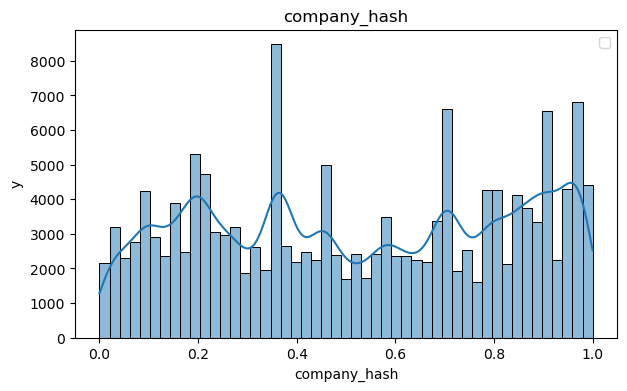

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


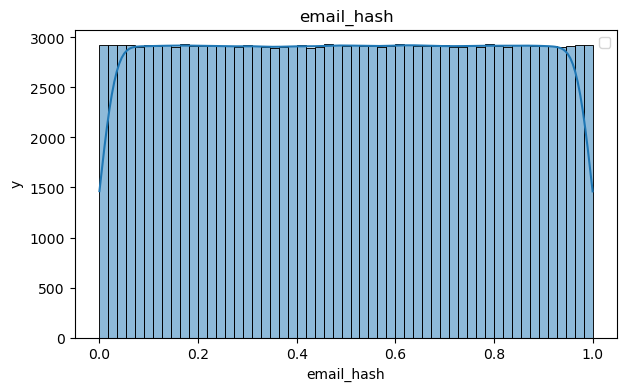

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


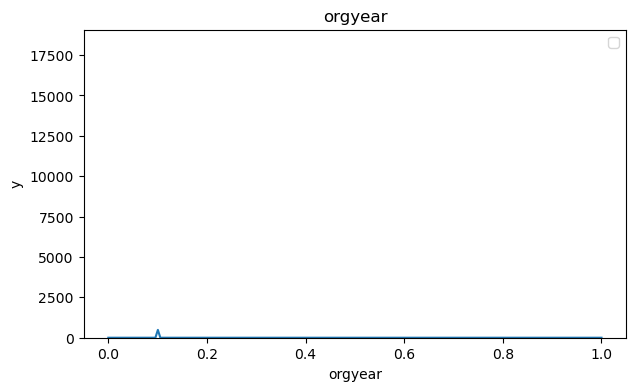

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


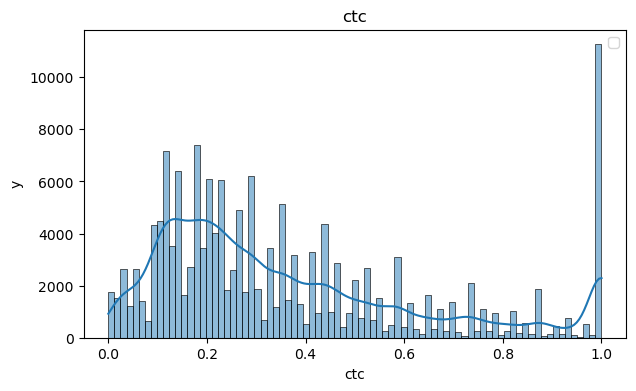

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


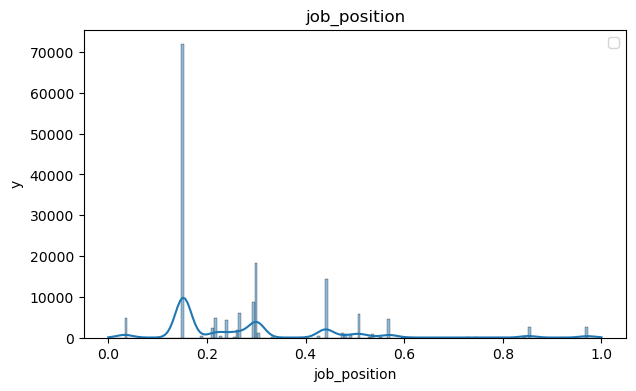

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


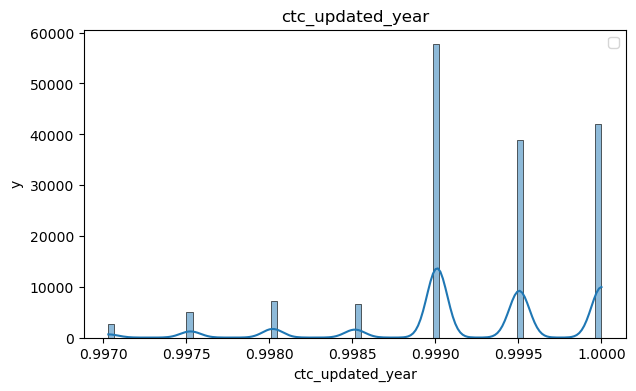

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


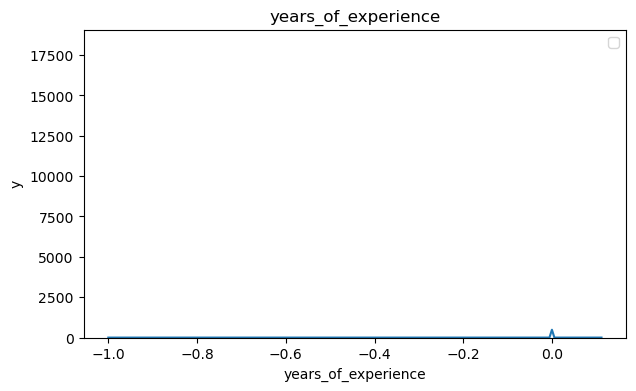

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


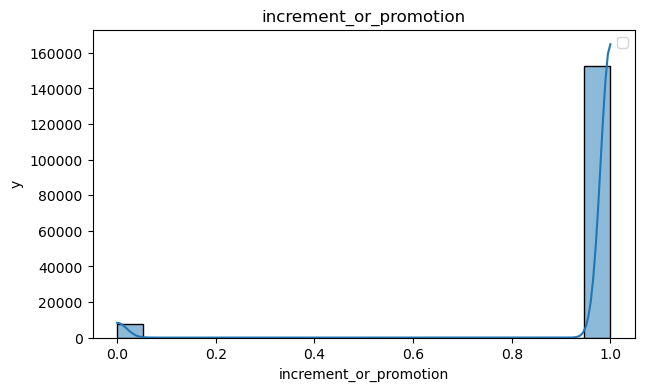

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


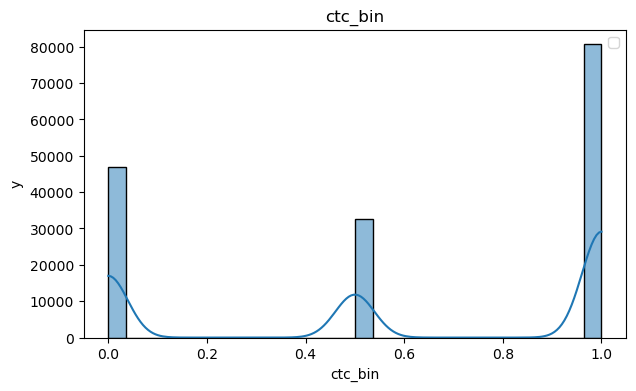

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


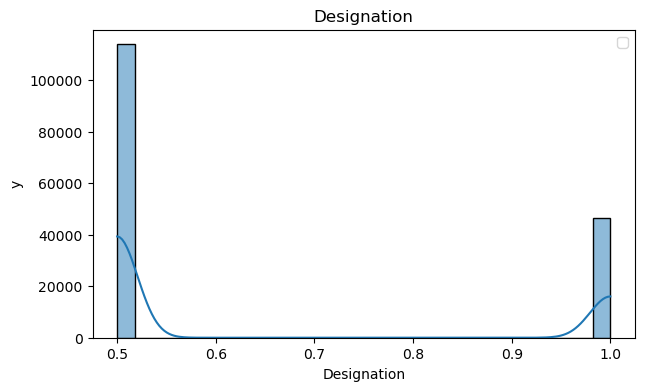

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


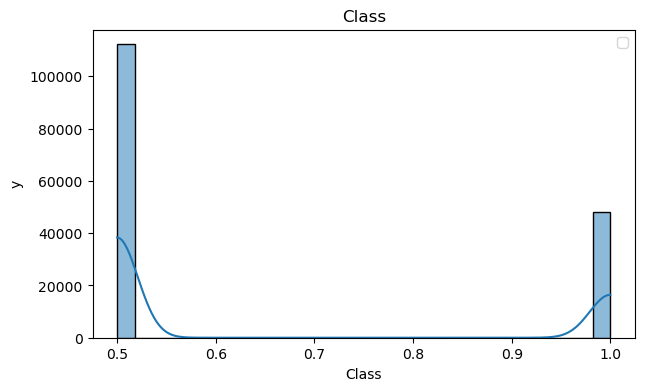

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


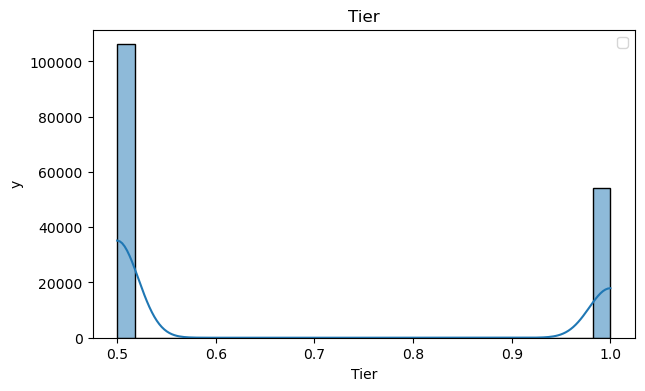

In [55]:
num_features = df_uns.shape[1]

for i in range(num_features):
    fig = plt.figure(figsize=(7, 4))
    sns.histplot(df_uns.iloc[:,i], kde=True)
    plt.xlabel(f'{df_uns.columns[i]}')
    plt.ylabel('y')
    plt.title(f'{df_uns.columns[i]}')
    plt.legend()
    plt.show()

In [56]:
X_train, X_test = train_test_split(df_uns, test_size=0.2, random_state=42)

In [57]:

def hopkins_statistic(X):
    
    X=X.values
    sample_size = int(X.shape[0]*0.05)
    
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
   
    w_distances = w_distances[: , 1]
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    H = u_sum/ (u_sum + w_sum)
    return H

In [58]:
H=hopkins_statistic(df_uns)
print("Hopkins Statistic value for the original dataset:",H)

Hopkins Statistic value for the original dataset: 0.9667273494260217


In [59]:
l = []
for i in range(20):
    H=hopkins_statistic(df_uns)
    l.append(H)
np.mean(l)

0.9665678244812094

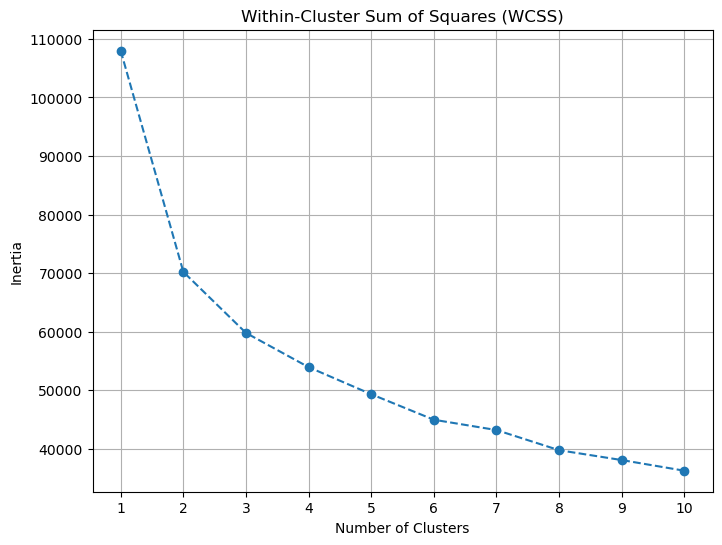

In [60]:
# Calculate inertia for a range of cluster numbers
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_uns)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Within-Cluster Sum of Squares (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [61]:

n_clusters = 4 

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

y_pred = kmeans.fit_predict(df_uns)

print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster centers:
[[8.11219593e-01 4.99435140e-01 9.99930249e-02 1.56582832e-01
  2.88630363e-01 9.99321114e-01 4.21181421e-04 9.48615633e-01
  9.99938799e-01 5.56696614e-01 5.48152954e-01 5.43636319e-01]
 [5.25839200e-01 4.99336456e-01 9.98121843e-02 6.77007078e-01
  2.44804978e-01 9.99242575e-01 6.22198519e-04 9.48259254e-01
  3.08036329e-01 8.62620981e-01 9.23707628e-01 9.95229577e-01]
 [2.72512204e-01 5.02536308e-01 9.99564998e-02 1.59177588e-01
  2.95119754e-01 9.99267165e-01 4.61781707e-04 9.53393028e-01
  1.00000000e+00 5.57862569e-01 5.51574526e-01 5.46481211e-01]
 [4.78928766e-01 4.98678809e-01 9.98699433e-02 4.52701166e-01
  2.63563709e-01 9.99138728e-01 5.57995353e-04 9.59116971e-01
  8.13921281e-02 5.77168102e-01 5.43140459e-01 5.50923746e-01]]


In [62]:
df_uns_label = pd.DataFrame(df_uns)
df_uns_label['label'] = kmeans.labels_
df_uns_label.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,increment_or_promotion,ctc_bin,Designation,Class,Tier,label
0,0.025941,0.428742,0.099975,0.321168,0.440587,0.999505,0.000441,1.0,0.0,0.5,1.0,0.5,3
1,0.528880,0.690261,0.100074,0.131387,0.301736,0.999010,0.000331,1.0,1.0,0.5,0.5,0.5,2
2,0.415630,0.282217,0.099926,0.583942,0.152203,0.999505,0.000496,1.0,0.5,0.5,1.0,1.0,1
3,0.324686,0.937612,0.100025,0.204380,0.152203,0.999010,0.000386,1.0,1.0,0.5,0.5,0.5,2
4,0.542438,0.436608,0.100025,0.408759,0.301736,0.999010,0.000386,1.0,0.0,0.5,1.0,1.0,1


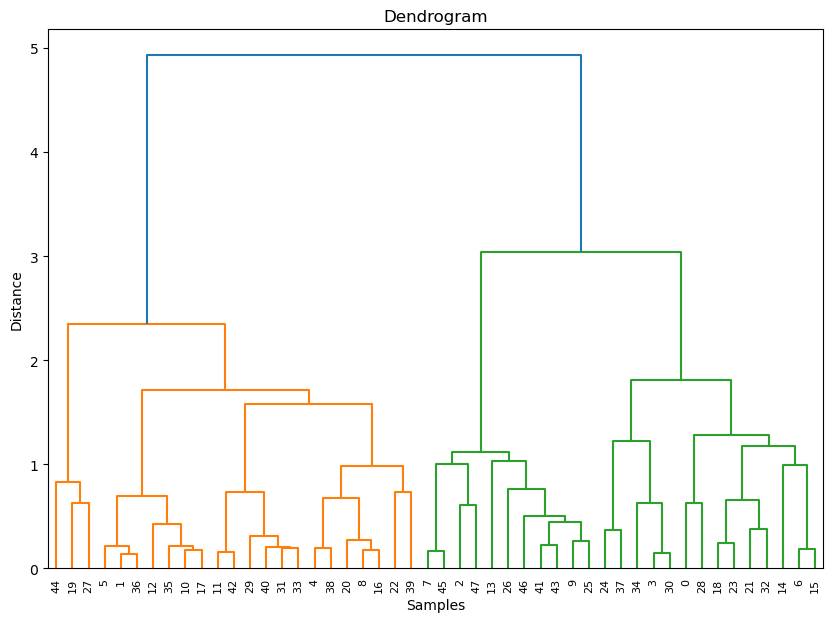

In [63]:
# Dendogram to decide optimal number of clusters.
sample_df = df_uns.sample(frac=0.0003, random_state=42)

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(shc.linkage(sample_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [64]:
n_clusters = 4  
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)

# Train the model on the dataset
cluster_labels = agg_cluster.fit_predict(sample_df)
cluster_labels

array([0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0,
       1, 0, 0, 2, 2, 3, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2,
       3, 2, 2, 2], dtype=int64)

In [65]:

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_uns)

# Get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate BCSS
bcss = 0
for i in range(len(centroids)):
    cluster_points = df_uns[labels == i]
    centroid = centroids[i]
    bcss += np.sum((cluster_points - centroid) ** 2)

print("BCSS:", bcss)

BCSS: company_hash              14480.698546
email_hash                13366.967219
orgyear                       2.013362
ctc                        4976.055339
job_position               4961.900515
ctc_updated_year              0.071823
years_of_experience           2.487688
increment_or_promotion     7315.507518
ctc_bin                    4820.122230
Designation                7006.500630
Class                      6793.215662
Tier                       6483.512359
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


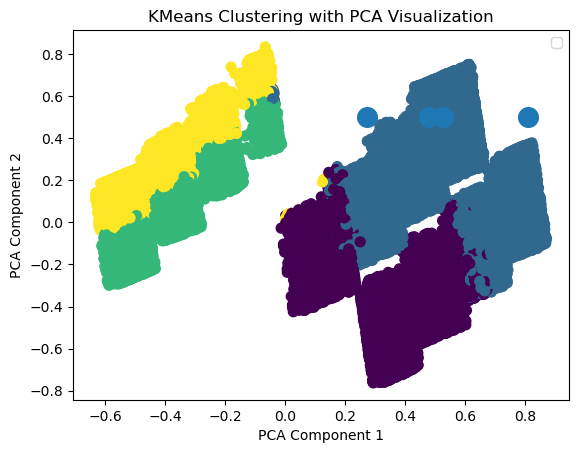

In [72]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_uns)
y_kmeans = kmeans.predict(df_uns)

# Use PCA to reduce data dimensionality for visualization
pca = PCA(n_components=3)
df_uns_pca = pca.fit_transform(df_uns)

# Visualize clusters
plt.scatter(df_uns_pca[:, 0], df_uns_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering with PCA Visualization')
plt.legend()
plt.show()

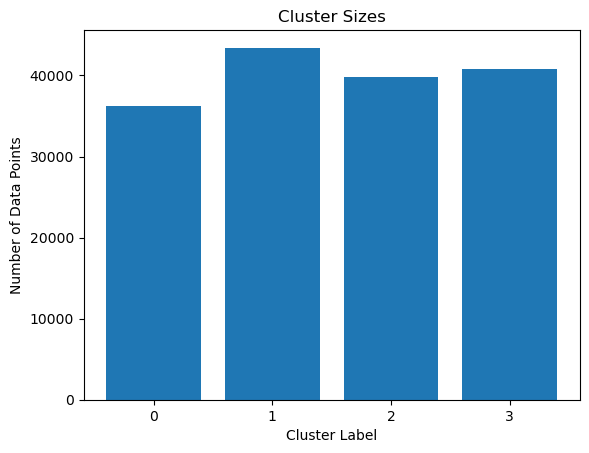

Cluster 0: 36289 data points
Cluster 1: 43420 data points
Cluster 2: 39774 data points
Cluster 3: 40829 data points


In [73]:
cluster_labels, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

# Visualize cluster sizes
plt.bar(cluster_labels, cluster_counts)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.xticks(cluster_labels)
plt.show()

# Print cluster sizes
for label, count in zip(cluster_labels, cluster_counts):
    print(f"Cluster {label}: {count} data points")

In [82]:
df_uns['Cluster'] = y_kmeans

# Calculate mean and median for each cluster
cluster_stats_mean = df_uns.groupby('Cluster').mean()
cluster_stats_median = df_uns.groupby('Cluster').median()

# Print the mean and median for each cluster
print("Mean for each cluster:")
print(cluster_stats_mean)
print("\nMedian for each cluster:")
print(cluster_stats_median)

Mean for each cluster:
         company_hash  email_hash   orgyear       ctc  job_position  \
Cluster                                                               
0            0.479127    0.498701  0.099870  0.452485      0.263778   
1            0.525877    0.499327  0.099812  0.678110      0.244539   
2            0.272622    0.502642  0.099957  0.159182      0.295144   
3            0.811348    0.499325  0.099993  0.156567      0.288616   

         ctc_updated_year  years_of_experience  increment_or_promotion  \
Cluster                                                                  
0                0.999139             0.000558                0.959189   
1                0.999242             0.000623                0.948135   
2                0.999267             0.000462                0.953387   
3                0.999321             0.000421                0.948639   

          ctc_bin  Designation     Class      Tier  
Cluster                                             

#### Insights

#### 1. From the given dataset we observe that around 70k learners are Backend Engineers which comes to around 60% of the top 5 job positions followed by FullStack Engineer with a count of around 18k (15.4% of top 5 job positions).
#### 2. In the year 2016 around 21% of the learners joined the organization.
#### 3. For the learners who are Backend Engineers their highest ctc is 1000150000.
#### 4. Around 37.8% of the learners got their ctc updated in the year 2019 followed by 27.6% and 25.5% in the years 2021 and 2020 respectively.
#### 5. Most of the learners who join the scaler are experienced in their profession majorly of 5-9 years and 6 and 8 years constitute of 13.4% and 13.3%.
#### 6. We noticed that Backened Engineer with 9 years of experience are being paid a ctc of 1000150000 followed by another Backend engineer with 6 years of experience are paid 255555555.
#### 7. As experience increases the salary got increased.
#### 8. The top 3 job positions are Backend Engineer , DevOps Engineer and Product Designer.
#### 9. Among the learners 95% of them have got increments are promotion in the organization.
#### 10. In the Tier 1 the Engineering Leeadership job with 21 years of experience is the top most job position where as in Tier 2 it is the Backend Engineer.
#### 11. We categorized the ctc into multiple ctc groups and identified that around 50% of the learners are having a ctc less than 1000000.
#### 12. For the given data we perfomed the outlier treatment IQR on the ctc and observed existence of outliers so we clip the values between lower and outer bound for the column to remove any outliers.
#### 13. We performed the LabelEncoder on the categorical columns and filled the missing values in orgyear column by KNNImputer.
#### 14. We performed the Hopkins Statistic on the dataset to check the clustering tendency and observed a strong clustering tendency in the dataset, which supports the validity of conducting clustering analysis on it.
#### 15. We plotted the inertia values obtained by fitting KMeans models with varying numbers of clusters (from 1 to 10).
#### 16. We augmented the original dataset by adding cluster labels obtained from KMeans clustering.
#### 17. We visualized the dendrogram which provides a hierarchical representation of the clustering structure in the data. 
#### 18. We computed the Between Cluster Sum of Squares (BCSS) to evaluate the dispersion of data points between clusters.
#### 19. We've visualized the clusters in the reduced-dimensional space by creating a scatter plot where each data point is colored according to its cluster assignment.
#### 20. A relatively balanced distribution of data points among the clusters.
#### 21. Central Tendency:
#### company_hash and email_hash: The mean and median values for these features are relatively close across all clusters, suggesting similar distributions of company and email hashes within each cluster.
#### orgyear: The mean and median values for orgyear are similar across clusters, indicating consistency in the organization's founding year within each cluster.
#### ctc (Cost to Company): Cluster 1 has the highest mean and median ctc values, indicating that this cluster may consist of individuals with higher salaries compared to other clusters. Clusters 2 and 3 have the lowest mean and median ctc values, suggesting lower salary levels.
#### job_position: The mean and median values for job_position vary across clusters, indicating differences in job roles or positions within each cluster.
#### increment_or_promotion: The mean value is close to 1 for all clusters, indicating that a high proportion of individuals within each cluster received an increment or promotion. The median value is also 1 for all clusters, suggesting that at least 50% of individuals in each cluster received an increment or promotion.

#### Cluster Profiling: 
#### Cluster 0:

#### 1. Moderate company and email hash values.
#### 2. Relatively low ctc values compared to other clusters.
#### 3. Mixed job positions.

#### Cluster 1:

#### 1. Relatively high company and email hash values.
#### 2. High ctc values, indicating higher salaries.
#### 3. Diverse job positions.

#### Cluster 2:

#### 1. Low company and email hash values.
#### 2. Low ctc values, indicating lower salaries.
#### 3. Predominantly specific job positions.

#### Cluster 3:

#### 1. High company hash values and average email hash values.
#### 2. Low ctc values, indicating lower salaries.
#### 3. Predominantly specific job positions.